### **Business Goal:**
With the available independent variables, we must model the demand for shared bikes. The management will use it to determine precisely how the needs change with changing features. They can adjust their business approach in accordance with demand levels and client expectations. The model will also help management better grasp the dynamics of demand in a new market. 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)

    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def boxplot(df, col_sel):
  plt.figure(figsize=(20,50))
  for index in range(0,len(col_sel)):
      plt.subplot(len(col_sel )+ 1,len(col_sel ),index+1)
      sns.set_style('whitegrid')
      sns.boxplot(y=df[col_sel[index]],data= df,color='green')
      plt.tight_layout()

In [ ]:
url= "https://drive.google.com/file/d/1QWbvorfLkLI0PXkrWd_q5YvNMJeRYK7l/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# df_days =pd.read_csv('/content/drive/MyDrive/DAE Project/day.csv')
# df_days.tail()

In [ ]:
# df_merged = pd.merge(df, df_days, on='yr') 

In [ ]:
# df_merged

In [ ]:
# df_merged['yr'].unique()

### **0. Information**

In [ ]:
# print(df_merged.shape)
print(df.shape)

(17379, 17)


* we have $17379$ instances and $17$ features

In [ ]:
display(df.describe())
# display(df_days.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


* above is a statestical description of the features in consideration

In [ ]:
display(df.info())
# print()
# print('For the days dataset we have')
# display(df_days.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

* discritive information about the dataset
* above shows that we have datatypes of integer and floats only 

In [ ]:
# list of all the featurs in the dataset
for i, feature in enumerate(df.columns):
    print(i+1 , feature)

1 instant
2 dteday
3 season
4 yr
5 mnth
6 hr
7 holiday
8 weekday
9 workingday
10 weathersit
11 temp
12 atemp
13 hum
14 windspeed
15 casual
16 registered
17 cnt


* above is a list of all the features we are considering in this dataset
* it can be noted that the naming convention is not precise thus we will need to fix them later

### **1. Preprossesing**

##### **NULL/MISSING values**

In [ ]:
display(df.isnull().sum())
# print()
# print()
# display(df_days.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* There are no missing values in the dataset

#### **Duplicate values**

In [ ]:
print("before dropping duplicates", df.shape)
df.drop_duplicates()
print("After dropping duplicates " , df.shape ) 

before dropping duplicates (17379, 17)
After dropping duplicates  (17379, 17)


* there are no duplicates in the dataset

#### **Column Renaming** 

In [ ]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


* above is current naming conventions but some are in abbreviations thus we need to rename them

In [ ]:
df.rename({'dteday': "date",
           'yr': 'year',
           'mnth' : 'month',
           'hr' : 'hour',
           'weathersit': 'weather',
           'temp': 'temperature',
           'atemp': 'a_temparature',
           'hum': 'humidity',
           'cnt': 'count'}, axis=1, inplace=True) 
df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'a_temparature',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### **2. Cleaning**

#### **Feature Engineering**

* the first thing to notice is that we have features which are not needed
* `'instant'` is just an index which we can drop
* `'date'` has already been decoposed into month, year all thats left is to compose it into day of the month


In [ ]:
df['day'] = pd.to_datetime(df['date']).dt.day
df = df[['date', 'hour', 'day',  'month', 'season', 'year', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity',
       'windspeed', 'casual', 'registered', 'count']]
df.head()

,date,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count
0,2011-01-01,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Outliers**

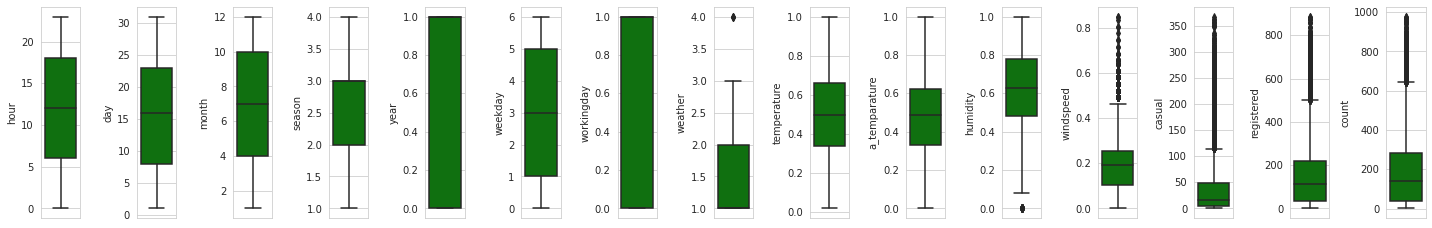

In [ ]:
col_sel1= ['hour', 'day',  'month', 'season', 'year', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity',
       'windspeed', 'casual', 'registered', 'count']

boxplot(df, col_sel1)

* the box plots shows that `weedspeed`, `casual`, `registered` and `count` have outliers
* They are not too big thus we will decide to leave them. they might have valuable information 

### **3. Data Analysis and Exploration**

#### **Correlation of the features**

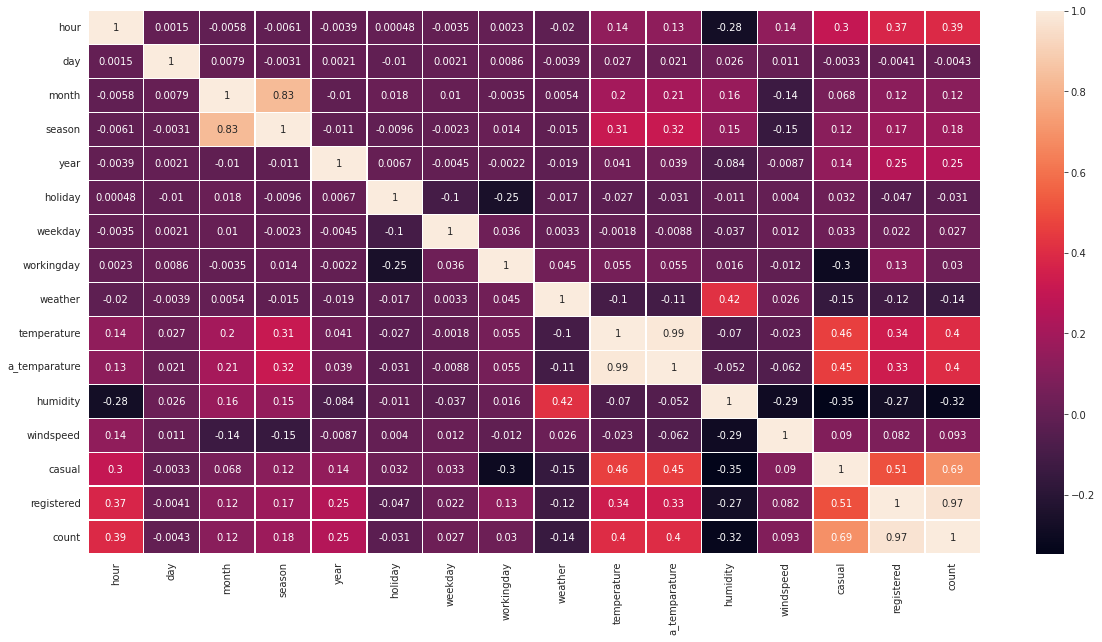

In [ ]:
d = df[['hour', 'day', 'month', 'season', 'year', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature','a_temparature', 'humidity', 'windspeed',
       'casual', 'registered', 'count']]

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(d.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

* count, casual and registered have a strong positive linear relationship
* month and season are also linearly independent this means we dont need the other if we have one.
* weather, humidity show a strong positive linear relationship against count

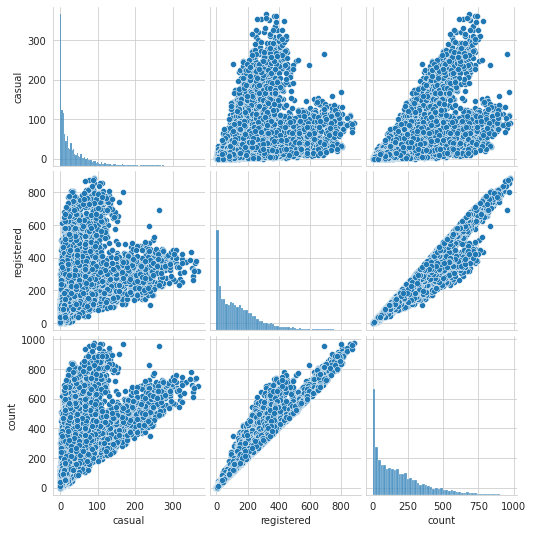

In [ ]:
d = df[[
       'casual', 'registered', 'count']]
sns.pairplot(d)
plt.show()

* The relationship between the casual, registered and count features is proportional.
* Registered has a high correlation to count than casual is to count.

#### **Exploratory analysis on Bike Hire**

* first we work with a copy of the data and add categorical data on it for the perpose of analysis and exploration

In [ ]:
bike = df.copy()
bike['weekday_name'] = pd.to_datetime(bike['date']).dt.day_name()
bike['month_name'] = pd.to_datetime(bike['date']).dt.month_name()
bike.head()

,date,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count,weekday_name,month_name
0,2011-01-01,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,January
1,2011-01-01,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,January
2,2011-01-01,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,January
3,2011-01-01,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,January
4,2011-01-01,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,January


Year (0: 2011,   1:2012)


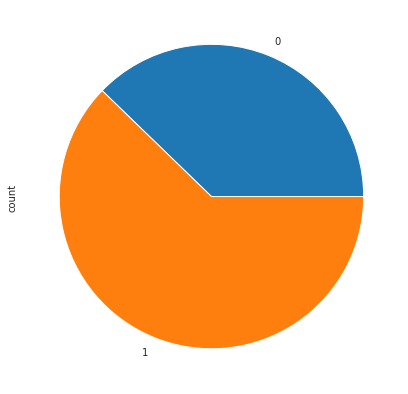

In [ ]:
bike.groupby(['year'])['count'].sum().plot.pie(figsize=(7,7))
print('Year (0: 2011,   1:2012)')

* We only have 2 years of data 2011 and 2012
* it is also shown that 2012 there was high rise of bike rental compared to 2011
* the petten show that there is popularity inbike rental as years progresses

working day 11865 
not work day 5514


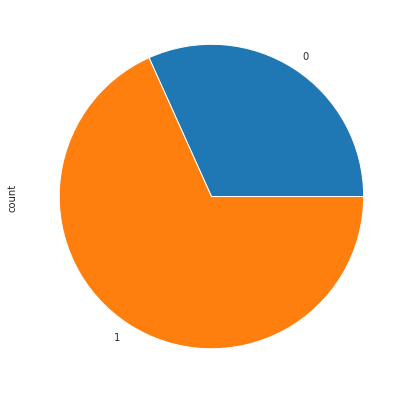

holiday 500 
not a holiday 16879


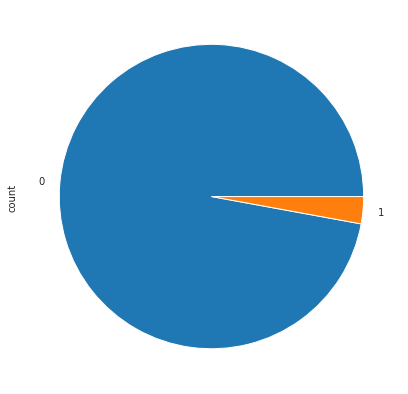

In [ ]:
workingday  = bike.groupby(['workingday'])['count'].count() 
print('working day', workingday[1], '\nnot work day', workingday[0])
workingday.plot.pie(figsize=(7,7))
plt.show()

workingday  = bike.groupby(['holiday'])['count'].count() 
print('holiday', workingday[1], '\nnot a holiday', workingday[0])
workingday.plot.pie(figsize=(7,7))
plt.show()

* Bikes are most hired if day is neither weekend nor holiday is

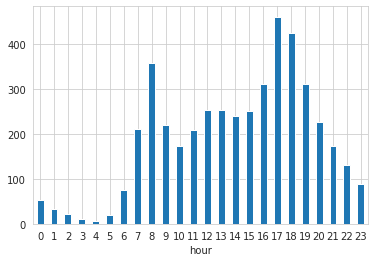

In [ ]:
weekday_name  = bike.groupby(['hour'])['count'].mean() 
weekday_name.plot.bar(rot=0)
plt.show()

* there are a lot of hires in the evening between 16-19 
* there is an ubnormal spike of bike hireing around 8 which could be becouse people are going to work and this is the most earliest time where there is a lot of commotion.

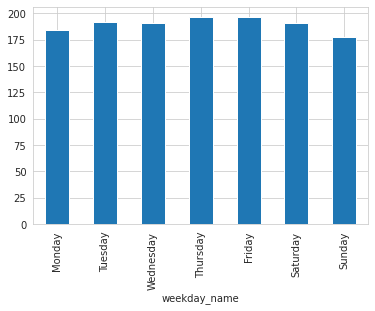

In [ ]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_name  = bike.groupby(['weekday_name'])['count'].mean().reindex(days) 
weekday_name.plot.bar()
plt.show()

* From Sunday to Mondays bike hires are increasing and drop on weekend

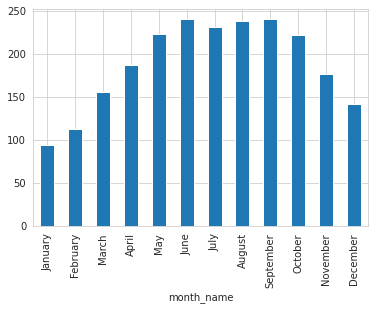

In [ ]:
months = list(bike['month_name'].unique())
month_name  = bike.groupby(['month_name'])['count'].mean().reindex(months) 
month_name.plot.bar()
plt.show()

* Months shows more difference in bike hire than week and there is a trand showing that bike hire increases from January-Sepeptember then decreases from October-December
* the highest hire being around August, June, September
* The lowest bieng at January

#### Seasons to months in London
* Spring: March to May.
* Summer: June to August.
* Autumn: September to November.
* Winter: December to February.

In [ ]:
bike.loc[bike['month_name'] == 'December', 'season'] = 4
bike.loc[bike['month_name'] == 'January', 'season'] = 4
bike.loc[bike['month_name'] == 'February', 'season'] = 4

bike.loc[bike['month_name'] == 'March', 'season'] = 1
bike.loc[bike['month_name'] == 'April', 'season'] = 1
bike.loc[bike['month_name'] == 'May', 'season'] = 1

bike.loc[bike['month_name'] == 'June', 'season'] = 2
bike.loc[bike['month_name'] == 'July', 'season'] = 2
bike.loc[bike['month_name'] == 'August', 'season'] = 2

bike.loc[bike['month_name'] == 'September', 'season'] = 3
bike.loc[bike['month_name'] == 'October', 'season'] = 3
bike.loc[bike['month_name'] == 'November', 'season'] = 3

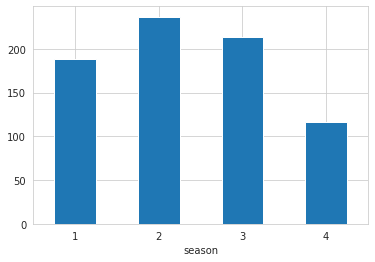

Season (1: spring, 2: summer, 3: autumn, 4: winter)


In [ ]:
season  = bike.groupby(['season'])['count'].mean() 
season.plot.bar(rot=0)
plt.show()
print('Season (1: spring, 2: summer, 3: autumn, 4: winter)')

* As the months show more significance difference on bike hire than days of the week, seasons have more symmetry than month and days of the week
* the Summer season is shown to have more bike hire than the other seasons. This is due to the fact that summers generally have  mild and pleasant, and not without occasional rain showers in London. \[[london perfect](https://www.londonperfect.com/plan-your-trip/practical-information/weather-seasons.php)\]
* Winters are cold and often rainy weather making the environment have temperatures not ideal for bike rides.

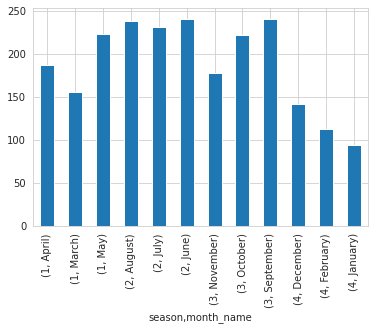

Season (1: spring, 2: summer, 3: autumn, 4: winter)


In [ ]:
seasons =[1, 2, 3, 4]
season  = bike.groupby(['season', 'month_name'])['count'].mean().sort_index(level =0)
season.plot.bar()
plt.show()
print('Season (1: spring, 2: summer, 3: autumn, 4: winter)')

* Looking at months within seasons, summer and autumn have the most active month during the course of the year
* summer has the most hires in June and lowest in July
* winter has the most hires in December and lowest in January
* spring has the most hires in May and lowest in March
* autumn has the most hires in September and lowest in November

* overall showing that winter is not good for buisness as alluded in the previous plot.

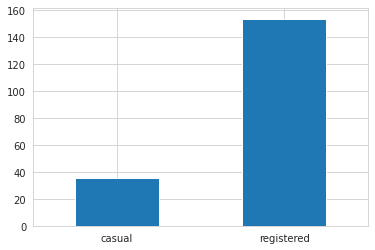

In [ ]:
bike[['casual', 'registered']].mean().plot.bar(rot=0)
plt.show()

* There are more registered customers than just casual castomers

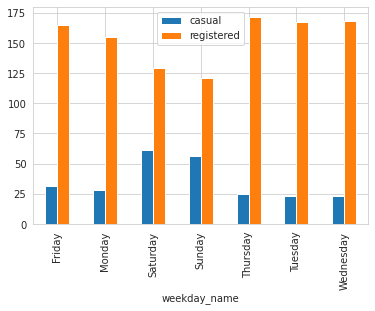

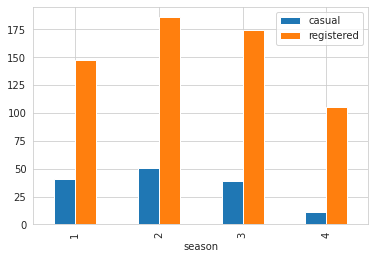

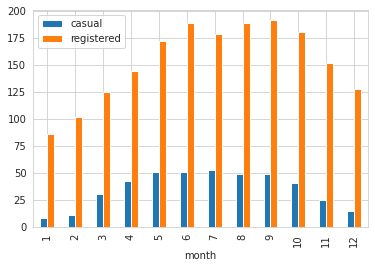

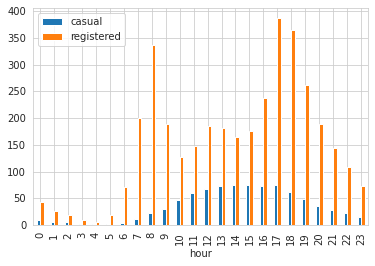

In [ ]:
bike.groupby(['weekday_name'])[['casual', 'registered']].mean().plot.bar()
bike.groupby(['season'])[['casual', 'registered']].mean().plot.bar()
bike.groupby(['month'])[['casual', 'registered']].mean().plot.bar()
bike.groupby(['hour'])[['casual', 'registered']].mean().plot.bar()
plt.show()

* the visuals above shows that regardless of the hour, day, month or season there are more registered customers than there are casual customers respectively.

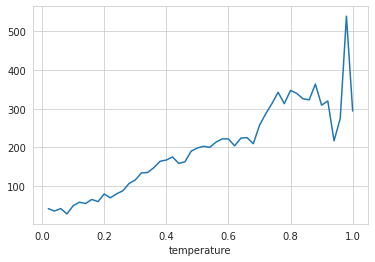

In [ ]:
bike.groupby(['temperature'])['count'].mean().plot()
plt.show()

* on avarage, the highter temperature the more people take rides

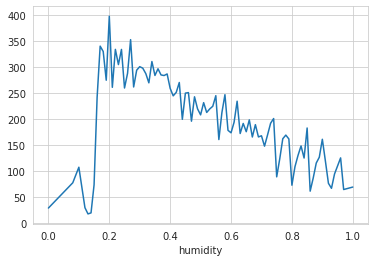

In [ ]:
bike.groupby(['humidity'])['count'].mean().plot()
plt.show()

* on avarage, the humid the air the less people take rides
* This make sense because humidity is inversly propotional to temperature thus if one gives more bike hires then the other will give less. 

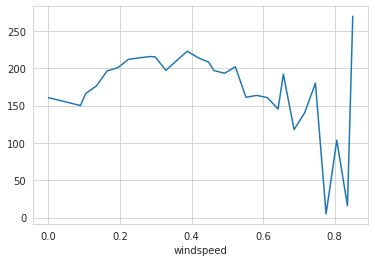

In [ ]:
bike.groupby(['windspeed'])['count'].mean().plot()
plt.show()

* There is no well defined relationship between wind speed and the backs are hired

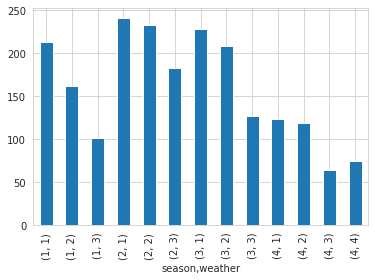

Weather Situation 
1: Clear, Few   clouds, Partly cloudy, Partly cloudy; 
2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; 
3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, 
4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)


In [ ]:
bike.groupby(['season','weather'])['count'].mean().plot.bar(rot=90)
plt.show()
print('Weather Situation \n1: Clear, Few   clouds, Partly cloudy, Partly cloudy; \n2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; \n3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, \n4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)')

* In Spring the weather that occurs often is number 1 and as expected in this season harsh weather conditions \[4\] seldom occur which is also shown in Summer and Autumn and this results to the number of bike hires on average to remain high.
* Winter has harsh weather condtions as depicted by the low number of bike hires on average.

### **4. Modelling**

#### **Training and Testing Data**

In [ ]:
df

,date,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count
0,2011-01-01,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,19,31,12,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,20,31,12,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,21,31,12,1,1,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,22,31,12,1,1,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Splitting the data into x values, which are to be used as the features, and the y values,which are to be used as the target. 
* We choose to ignore the casual and registered columns as they are both summed up in the count column

In [ ]:
x = df[["hour","day","month","season","year","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed"]]
x

,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed
0,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000
3,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000
4,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,19,31,12,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,20,31,12,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,21,31,12,1,1,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,22,31,12,1,1,0,1,1,1,0.26,0.2727,0.56,0.1343


In [ ]:
y = df[["count"]]
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


* Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### **Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

* Creating an instance of the Linear Regression model

In [ ]:
linear = LinearRegression()

* Fitting the model to the training data

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

* Printing Coefficients of the model

In [ ]:
print('Coefficients: \n', linear.coef_)

Coefficients: 
 [[ 7.73253877e+00 -1.23078994e-01  3.16275945e-02  2.01029089e+01
   8.24604874e+01 -1.91505118e+01  2.03753431e+00  5.96116302e+00
  -3.50164008e+00  9.63376081e+01  2.10706335e+02 -1.99410025e+02
   4.70645317e+01]]


#### **Model Prediction**

In [ ]:
predictions = linear.predict(X_test)

In [ ]:
y_test

,count
5861,291
9673,9
4246,340
13347,133
13617,213
...,...
7854,109
5947,119
248,136
8851,69


In [ ]:
predictions

array([[171.32404774],
       [ 40.18032923],
       [347.57667741],
       ...,
       [ 13.26783349],
       [115.8473738 ],
       [160.84484453]])

Text(0, 0.5, 'Predicted Y')

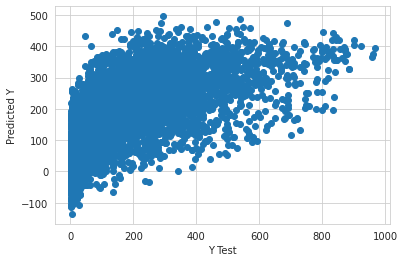

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 105.64211282604815
MSE: 19921.972390214367
RMSE: 141.14521738342523


### **Random Forest**

* Used to identify the most important features to train our model on

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)

In [ ]:
importances = model.feature_importances_
importances
Cols = np.array(["hour","day","month","season","year","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed"])
feature_importance = pd.DataFrame({'Feature':Cols, 'Importance':importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
0,hour,0.605511
9,temperature,0.116376
4,year,0.083355
7,workingday,0.058159
10,a_temparature,0.024572
11,humidity,0.023248
3,season,0.022138
8,weather,0.018079
2,month,0.014179
6,weekday,0.012769


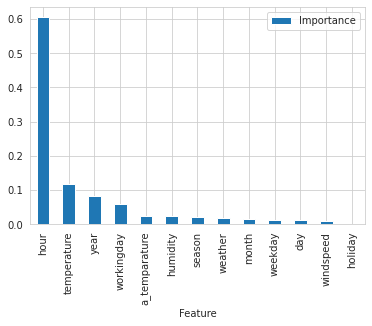

In [ ]:
feature_importance.plot.bar(x = "Feature",y="Importance")
plt.show()

* With the aim of improving our model performance we plan to use the top 5 features with the highest importances to trauin our model

In [ ]:
new_x = df[["hour","year","workingday","temperature","a_temparature","humidity"]]

In [ ]:
new_y = df[["count"]]

In [ ]:
newX_train, newX_test, newy_train, newy_test = train_test_split(new_x, new_y, test_size=0.3, random_state=101)

In [ ]:
new = LinearRegression()
new.fit(newX_train,newy_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', new.coef_)

Coefficients: 
 [[   7.74404969   81.44135741    7.26871497  133.41763988  210.78353211
  -194.1928736 ]]


In [ ]:
newpredictions = new.predict(newX_test)

Text(0, 0.5, 'Predicted Y')

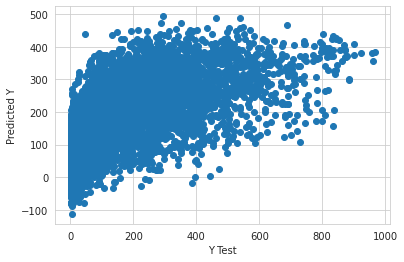

In [ ]:
plt.scatter(newy_test,newpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(newy_test, newpredictions))
print('MSE:', metrics.mean_squared_error(newy_test, newpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(newy_test, newpredictions)))

MAE: 106.3206197261239
MSE: 20346.196759263566
RMSE: 142.64009520209794


In [ ]:
#from sklearn.feature_selection import RFE 
#rfe_selector = RFE(estimator=LinearRegression(),n_features_to_select = 6, step = 1)
#rfe_selector.fit(newX_train, newy_train)
#newX_train.columns[rfe_selector.get_support()]